<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/3_1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Univariate Linear Regression`

[Link to download the Dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created** :June 6,2021

**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

**Main Change**: Predicting values of `G3` using `G2`




## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


In [3]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


In [4]:
import os

In [5]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [7]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [8]:
uniMathData = mathData[['G2', 'G3']]
uniMathData.head(5)

,G2,G3
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10


In [9]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [10]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


## Data visualization

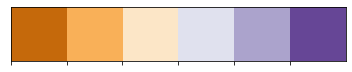

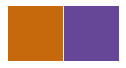

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
uniMathData.columns #columns in the dataframe

Index(['G2', 'G3'], dtype='object')

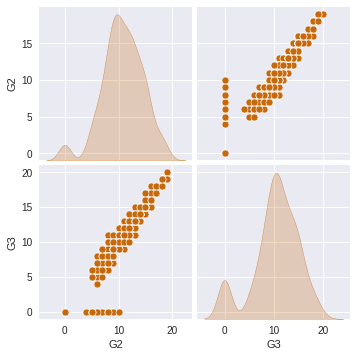

In [13]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G2', 'G3'],
             y_vars =  ['G2', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [14]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G2  G3
329  14  14
318  11  10
317  10   9
65   15  15
59   16  16
    G2  G3
9   15  15
25   9   8
28  11  11
31  16  17
32  16  16


In [15]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [17]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G2  G3
329  14  14
318  11  10
317  10   9
65   15  15
59   16  16
    G2  G3
9   15  15
25   9   8
28  11  11
31  16  17
32  16  16


In [18]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [19]:
print(trainFeatures.head())
print(testFeatures.head())

     G2
329  14
318  11
317  10
65   15
59   16
    G2
9   15
25   9
28  11
31  16
32  16


In [20]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [40]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adagrad(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [41]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 18ms/step - loss: 1.0044 - mae: 1.0044 - mse: 4.3322 - val_loss: 0.7976 - val_mae: 0.7976 - val_mse: 2.8227
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 1.0041 - mae: 1.0041 - mse: 4.3313 - val_loss: 0.7983 - val_mae: 0.7983 - val_mse: 2.8231
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 1.0038 - mae: 1.0038 - mse: 4.3327 - val_loss: 0.7982 - val_mae: 0.7982 - val_mse: 2.8230
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 1.0036 - mae: 1.0036 - mse: 4.3324 - val_loss: 0.7976 - val_mae: 0.7976 - val_mse: 2.8228
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 1.0036 - mae: 1.0036 - mse: 4.3323 - val_loss: 0.7981 - val_mae: 0.7981 - val_mse: 2.8230
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 1.0036 - mae: 1.0036 - mse: 4.3323 - val_loss: 0.7977 - val_mae: 0.7977 - val_mse: 2.8227
Epoch 7/300
10/10 [==

``` From the above code cell as the number of epochs increased... Loss and other parameteres decreased ```

In [37]:
print(history)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


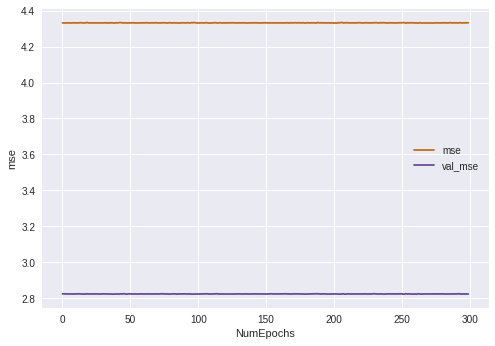

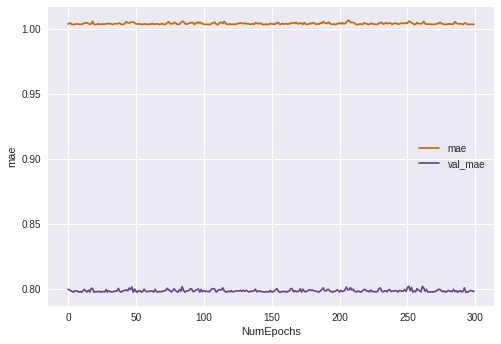

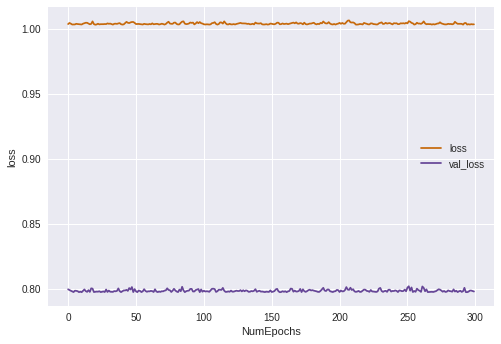

In [39]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [29]:
model.predict([1])

array([[1.0000987]], dtype=float32)

In [30]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0000987]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0000987]
 [2.0001462]
 [3.0001936]
 [4.000241 ]
 [5.000288 ]]

List of Predictions (flattened out):
[1.0000987 2.0001462 3.0001936 4.000241  5.000288 ]



In [31]:
print(testFeatures)

     G2
9    15
25    9
28   11
31   16
32   16
..   ..
365  10
367   6
379  10
381   6
393  12

[79 rows x 1 columns]


In [32]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [33]:
print(len(testPreds))
print(testPreds)

79
[1.50007610e+01 9.00047779e+00 1.10005722e+01 1.60008087e+01
 1.60008087e+01 1.20006199e+01 1.30006666e+01 1.80009041e+01
 1.90009499e+01 1.00005245e+01 1.50007610e+01 1.50007610e+01
 6.00033569e+00 6.00033569e+00 1.00005245e+01 1.40007143e+01
 1.00005245e+01 1.70008564e+01 9.00047779e+00 1.10005722e+01
 1.50007610e+01 1.40007143e+01 1.30006666e+01 1.40007143e+01
 8.00043011e+00 4.00024080e+00 5.14367057e-05 1.10005722e+01
 1.30006666e+01 1.00005245e+01 1.10005722e+01 1.10005722e+01
 1.10005722e+01 5.00028801e+00 9.00047779e+00 1.20006199e+01
 8.00043011e+00 9.00047779e+00 1.50007610e+01 9.00047779e+00
 9.00047779e+00 6.00033569e+00 1.20006199e+01 5.14367057e-05
 1.20006199e+01 5.14367057e-05 1.00005245e+01 1.10005722e+01
 1.20006199e+01 1.70008564e+01 1.00005245e+01 1.40007143e+01
 9.00047779e+00 1.00005245e+01 1.40007143e+01 1.10005722e+01
 1.50007610e+01 1.20006199e+01 1.30006666e+01 9.00047779e+00
 1.40007143e+01 8.00043011e+00 1.50007610e+01 8.00043011e+00
 1.50007610e+01 1.200

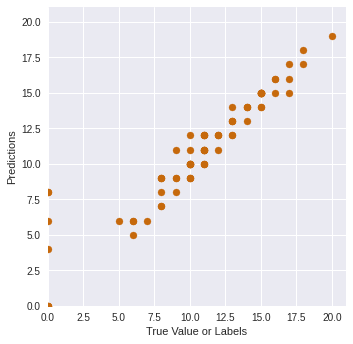

In [34]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

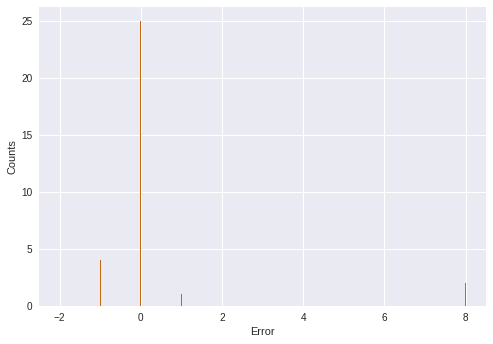

In [35]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions